In [2]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

activation_functions = {
    "relu": (relu, relu_derivative),
    "sigmoid": (sigmoid, sigmoid_derivative),
    "softmax": (softmax, None)
}

class NeuralNetwork:
    def __init__(self, layer_dims, activations):
        np.random.seed(1)
        self.parameters = {}
        for l in range(1, len(layer_dims)):
            self.parameters[f"W{l}"] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
            self.parameters[f"b{l}"] = np.zeros((layer_dims[l], 1))
        self.activations = activations

    def forward_prop(self, X):
        self.caches = []
        A = X
        L = len(self.parameters) // 2
        for l in range(1, L + 1):
            A_prev = A
            Z = np.dot(self.parameters[f"W{l}"], A_prev) + self.parameters[f"b{l}"]
            activation_function, _ = activation_functions[self.activations[l-1]]
            A = activation_function(Z)
            self.caches.append((A_prev, self.parameters[f"W{l}"], self.parameters[f"b{l}"], Z, self.activations[l-1]))
        return A

    def compute_cost(self, AL, Y):
        m = Y.shape[1]
        cost = -np.sum(Y * np.log(AL + 1e-8)) / m
        return np.squeeze(cost)

    def backward_prop(self, AL, Y):
        grads = {}
        L = len(self.caches)
        m = AL.shape[1]
        dAL = AL - Y
        current_cache = self.caches[-1]
        A_prev, W, b, Z, activation = current_cache
        grads[f"dW{L}"] = np.dot(dAL, A_prev.T) / m
        grads[f"db{L}"] = np.sum(dAL, axis=1, keepdims=True) / m
        grads[f"dA{L-1}"] = np.dot(W.T, dAL)
        for l in reversed(range(L-1)):
            current_cache = self.caches[l]
            A_prev, W, b, Z, activation = current_cache
            _, activation_derivative = activation_functions[activation]
            dZ = grads[f"dA{l+1}"] * activation_derivative(Z)
            grads[f"dW{l+1}"] = np.dot(dZ, A_prev.T) / m
            grads[f"db{l+1}"] = np.sum(dZ, axis=1, keepdims=True) / m
            grads[f"dA{l}"] = np.dot(W.T, dZ)
        return grads

    def update_parameters(self, grads, learning_rate):
        L = len(self.parameters) // 2
        for l in range(1, L + 1):
            self.parameters[f"W{l}"] -= learning_rate * grads[f"dW{l}"]
            self.parameters[f"b{l}"] -= learning_rate * grads[f"db{l}"]

    def fit(self, X, Y, learning_rate=0.01, num_iterations=1000, verbose=False):
        costs = []
        for i in range(num_iterations):
            AL = self.forward_prop(X)
            cost = self.compute_cost(AL, Y)
            grads = self.backward_prop(AL, Y)
            self.update_parameters(grads, learning_rate)
            costs.append(cost)
            if i % 100 == 0:
                if verbose:
                    print(f"Cost after iteration {i}: {cost}")
        plt.plot(np.squeeze(costs))
        plt.ylabel('Cost')
        plt.xlabel('Iterations (per 100)')
        plt.title(f"Learning rate = {learning_rate}")
        plt.show()

    def predict(self, X):
        AL = self.forward_prop(X)
        predictions = np.argmax(AL, axis=0)
        return predictions


In [1]:
def f1_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0

    f1 = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0
    return f1

def f1_score_multiclass(y_true, y_pred, average='macro'):
    unique_classes = np.unique(y_true)
    f1_scores = []

    for cls in unique_classes:
        y_true_binary = (y_true == cls).astype(int)
        y_pred_binary = (y_pred == cls).astype(int)
        f1_scores.append(f1_score(y_true_binary, y_pred_binary))

    if average == 'macro':
        return np.mean(f1_scores)
    elif average == 'weighted':
        weights = [np.sum(y_true == cls) for cls in unique_classes]
        return np.average(f1_scores, weights=weights)

In [3]:
def one_hot_encode(Y, num_classes):
    encoded = np.zeros((num_classes, Y.shape[0]))
    for idx, label in enumerate(Y):
        encoded[label, idx] = 1
    return encoded

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/colab work ML/Data/nn_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/colab work ML/Data/nn_test.csv')

1 = Planes

2 = Cars

3 = Bird

4 = Cat

5 = Deer

6 = Dog

7 = Frog

8 = Horse

9 = Boat / Yacht

10= Truck

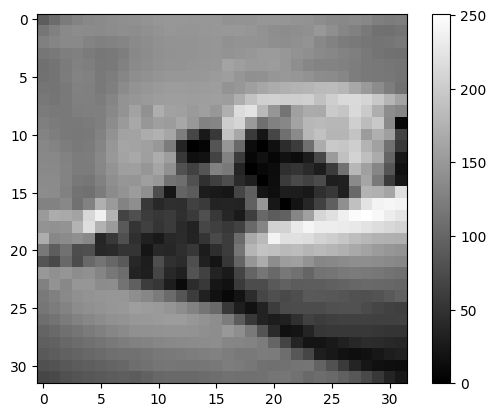

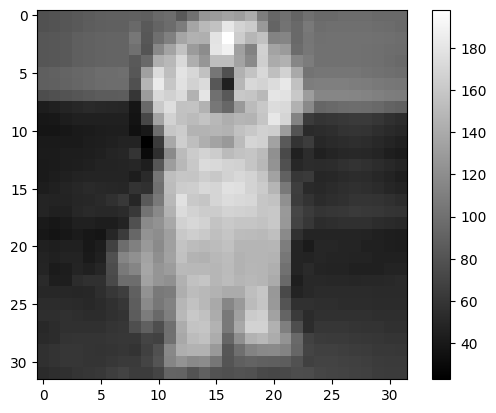

In [ ]:
a = 6
b = 1
rand = np.random.randint(100)
if b==1:
  t= np.where((df_train['binary_label']==b) & (df_train['class_label']==a))[0][rand]
  image = df_train.iloc[t, 1:1025].values.reshape(32, 32)
  plt.imshow(image, cmap='gray')
  plt.colorbar()
  plt.show()

In [5]:
np.unique(df_train['class_label'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Let's get some work going


In [6]:
X_train_pre = df_train.iloc[:, 1:1025].values / 255.0
X_train_pre = X_train_pre.T
X_test = df_test.iloc[:, 1:1025].values / 255.0
X_test = X_test.T
Y_train_pre = df_train.iloc[:, 1026].values
Y_train_pre = one_hot_encode(Y_train_pre, 11)
Y_train_pre = Y_train_pre[1:,:]

In [7]:
indices = np.random.randint(0, X_train_pre.shape[1], 5000)
X_train = X_train_pre[:, indices]
Y_train = Y_train_pre[:, indices]

X_train.shape, Y_train.shape

((1024, 5000), (10, 5000))

Cost after iteration 0: 2.6241475817733133
Cost after iteration 100: 2.1473999524378486
Cost after iteration 200: 2.0654528358173057
Cost after iteration 300: 2.016259989237952
Cost after iteration 400: 1.9806128171652184
Cost after iteration 500: 1.9522919313577554
Cost after iteration 600: 1.9274795145681098
Cost after iteration 700: 1.9050738207552897
Cost after iteration 800: 1.883320754908516
Cost after iteration 900: 1.8625708057591386
Cost after iteration 1000: 1.8422172358017819
Cost after iteration 1100: 1.8217918415932175
Cost after iteration 1200: 1.8014736561431328
Cost after iteration 1300: 1.7815943922483217
Cost after iteration 1400: 1.7619399741097368
Cost after iteration 1500: 1.7425918981317503
Cost after iteration 1600: 1.7246952945239096
Cost after iteration 1700: 1.7110982448928587
Cost after iteration 1800: 1.696170837742613
Cost after iteration 1900: 1.679037318953252
Cost after iteration 2000: 1.662149296507261
Cost after iteration 2100: 1.6465760135473753
Cost 

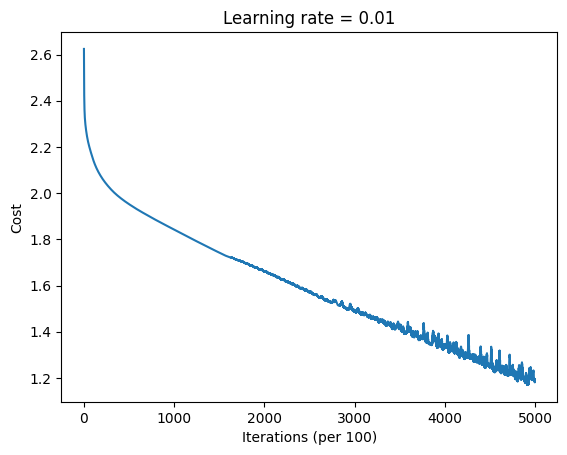

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [10]:

layer_dims = [1024,128,100,80,10]
activations = ["relu", "relu", "relu", "softmax"]
nn = NeuralNetwork(layer_dims, activations)
nn.fit(X_train, Y_train, learning_rate=0.01, num_iterations=5000, verbose=True)


In [12]:

predictions = nn.predict(X_train)
labels = np.argmax(Y_train, axis=0)
accuracy = f1_score_multiclass(labels, predictions) * 100
print(f"Test accuracy: {accuracy:.2f}%")

Test accuracy: 58.90%


In [13]:
X_test_pre = df_train.iloc[:, 1:1025].values / 255.0
print(X_test_pre.shape)
X_test_pre = X_test_pre.T
Y_test_pre = df_train.iloc[:, 1026].values
Y_test_pre = one_hot_encode(Y_test_pre, 11)
Y_test_pre = Y_test_pre[1:,:]

print(X_test_pre.shape)
print(Y_test_pre.shape)

predictions = nn.predict(X_test_pre)
labels = np.argmax(Y_test_pre, axis=0)
accuracy = np.mean(f1_score_multiclass(labels, predictions)) * 100
print(f"Test accuracy: {accuracy:.2f}%")

(80000, 1024)
(1024, 80000)
(10, 80000)
Test accuracy: 38.68%


In [14]:
predictions_testfile = nn.predict(X_test)
predictions_testfile = predictions_testfile+1
print(predictions_testfile)
np.unique(predictions_testfile, return_counts=True)

[7 9 9 ... 9 3 4]


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 819, 2670, 1225, 2216,  924, 2567, 4199, 1097, 2446, 1837]))

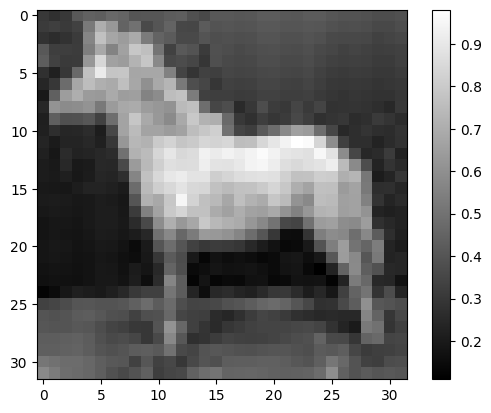

7


In [15]:
index = np.random.randint(X_test.shape[0])
image = X_test[:, index].reshape(32, 32)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()
print(predictions_testfile[index])

In [16]:
Y_train_binary_pre = df_train.iloc[:, 1025].values
Y_train_binary_pre = one_hot_encode(Y_train_binary_pre, 2)

In [17]:
Y_train_binary_pre.shape

(2, 80000)

In [18]:
indices = np.random.randint(0, X_train_pre.shape[1], 5000)
Y_train_binary = Y_train_binary_pre[:, indices]
X_train = X_train_pre[:, indices]

Cost after iteration 0: 1.069129262107643
Cost after iteration 100: 0.6344135481829211
Cost after iteration 200: 0.6200181276003032
Cost after iteration 300: 0.6103435762837098
Cost after iteration 400: 0.6019422719915384
Cost after iteration 500: 0.5941979384463347
Cost after iteration 600: 0.5866625957943808
Cost after iteration 700: 0.5794910134522687
Cost after iteration 800: 0.5730717351768082
Cost after iteration 900: 0.5727613937649787
Cost after iteration 1000: 0.5687333864150618
Cost after iteration 1100: 0.5636631444652846
Cost after iteration 1200: 0.5583439797584897
Cost after iteration 1300: 0.5541371834385947
Cost after iteration 1400: 0.549104792977903
Cost after iteration 1500: 0.5431723060782672
Cost after iteration 1600: 0.5379239909422933
Cost after iteration 1700: 0.5334117659209483
Cost after iteration 1800: 0.5288697621197861
Cost after iteration 1900: 0.5243659251503215
Cost after iteration 2000: 0.5205271864101266
Cost after iteration 2100: 0.5161210274607729
Co

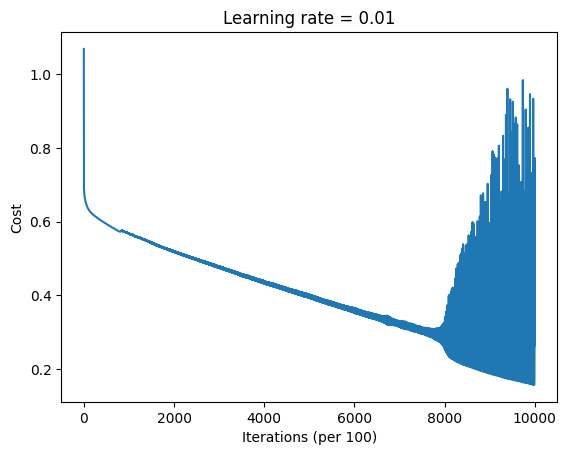

Test accuracy: 93.24%


In [19]:
layer_dims = [1024,128,100,2]
activations = ["relu", "relu", "softmax"]
nnb = NeuralNetwork(layer_dims, activations)
nnb.fit(X_train, Y_train_binary, learning_rate=0.01, num_iterations=10000, verbose=True)
predictions = nnb.predict(X_train)
labels = np.argmax(Y_train_binary, axis=0)
accuracy = np.mean(predictions == labels) * 100
print(f"Test accuracy: {accuracy:.2f}%")

In [20]:
predictions = nnb.predict(X_train_pre)
labels = np.argmax(Y_train_binary_pre, axis=0)
accuracy = (f1_score(labels, predictions)) * 100
print(f"Test accuracy: {accuracy:.2f}%")

Test accuracy: 73.63%
